<a href="https://colab.research.google.com/github/cybxlib/nodar.m/blob/main/TensorFlowExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


### 2. Generate Synthetic Data

For a simple regression example, we'll create some linear data with a bit of noise. Our goal will be to train a model to learn the relationship between `X` and `y`.

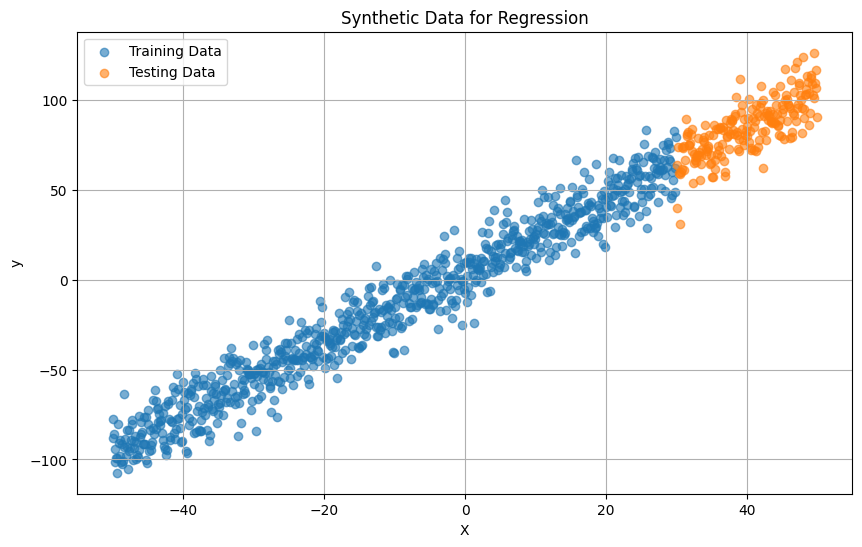

In [ ]:
X = np.arange(-50, 50, 0.1)
y = 2 * X + 5 + np.random.normal(0, 10, len(X)) # y = 2x + 5 with some noise

# Split data into training and testing sets
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data', alpha=0.6)
plt.scatter(X_test, y_test, label='Testing Data', alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data for Regression')
plt.legend()
plt.grid(True)
plt.show()

### 3. Build a Simple Model

We'll create a very simple sequential model with a single dense layer. A dense layer means all neurons in the previous layer are connected to all neurons in the current layer. Since it's a regression problem, the output layer will have 1 neuron with no activation function (linear activation is default for regression).

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # One neuron, expecting one input feature
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### 4. Compile the Model

Before training, we need to compile the model. This involves:
*   **Optimizer**: How the model updates its weights based on the loss function (e.g., `adam`, `sgd`).
*   **Loss Function**: Measures how far off our predictions are from the actual values (e.g., `mse` for Mean Squared Error, common for regression).
*   **Metrics**: Used to monitor the training process (e.g., `mae` for Mean Absolute Error).

In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

### 5. Train the Model

Now we train the model using our training data. `epochs` specifies how many times the model will see the entire training dataset. The `validation_split` parameter can be used to reserve a portion of the training data for validation during training.

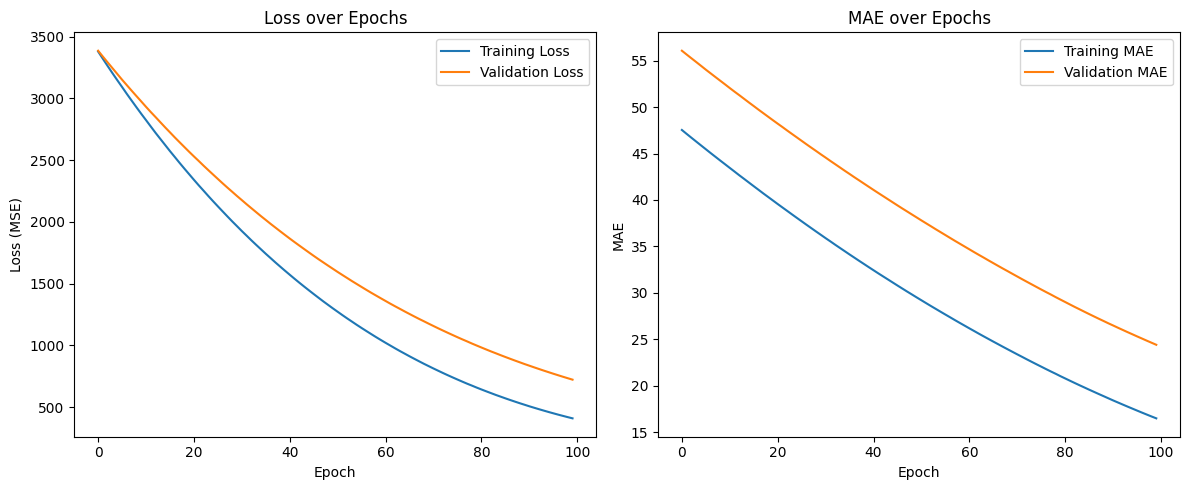

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0, # Suppress verbose output to keep it clean
    validation_split=0.2
)

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

### 6. Evaluate the Model

After training, we evaluate the model's performance on the unseen test data to get an unbiased estimate of its generalization ability.

In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

Test Loss (MSE): 1680.8278
Test MAE: 39.4269


### 7. Make Predictions and Visualize

Finally, we can use our trained model to make predictions on new data (in this case, our test set) and visualize how well the predicted line fits the actual data.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


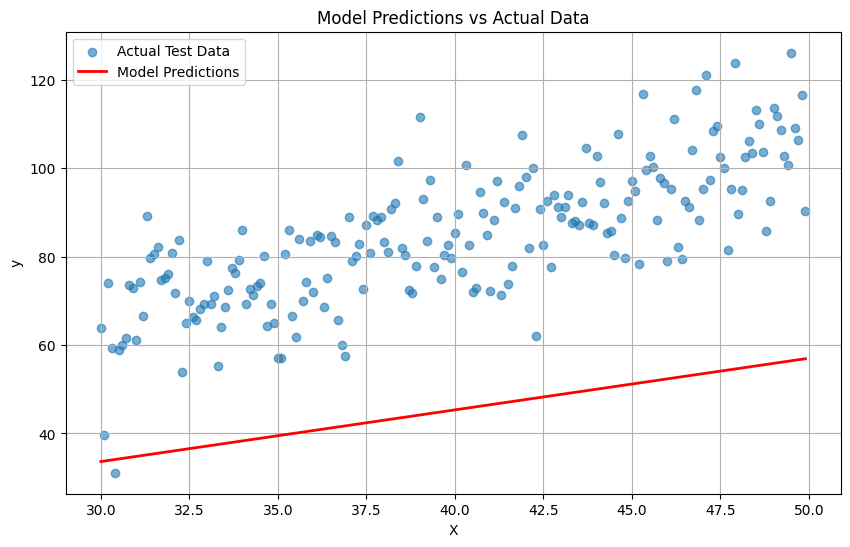

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual Test Data', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Model Predictions', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions vs Actual Data')
plt.legend()
plt.grid(True)
plt.show()

The red line represents the regression line learned by our simple TensorFlow model, which closely approximates the linear relationship in our synthetic data.